<a href="https://colab.research.google.com/github/tamara-kostova/MSc_Thesis_Neuroimaging/blob/master/01_data_download_and_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare data

Mount drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install requirements

In [2]:
!pip install -q kaggle nibabel pydicom opencv-python matplotlib seaborn tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 15.0 MB/s eta 0:00:00


Set up Kaggle secrets

In [3]:
from google.colab import userdata
import os
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

## Download datasets

### Brain tumor detection dataset

The Br35H - Brain Tumor Detection 2020 dataset, containing brain tumor images, and normal controls.

In [4]:
!kaggle datasets download -d ahmedhamada0/brain-tumor-detection -p /content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw --unzip

Dataset URL: https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection
License(s): copyright-authors
 69% 58.0M/84.0M [00:00<00:00, 283MB/s]
100% 84.0M/84.0M [00:00<00:00, 270MB/s]


### Brain tumor 17 classes dataset

The Figshare Brain Tumor dataset contains 3,064 T1-weighted contrast-enhanced MRI slices from 233 patients, labeled into meningioma, glioma, and pituitary tumor.


In [5]:
!kaggle datasets download -d fernando2rad/brain-tumor-mri-images-17-classes -p /content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw --unzip


Dataset URL: https://www.kaggle.com/datasets/fernando2rad/brain-tumor-mri-images-17-classes
License(s): ODbL-1.0
 97% 191M/197M [00:01<00:00, 72.3MB/s]
100% 197M/197M [00:01<00:00, 124MB/s] 


### Brain tumor 44 classes dataset

The Kaggle Brain Tumor MRI Images datasets with 44 and 17 classes provide broader subtype labels, used here primarily for classification bench-marking.


In [6]:
!kaggle datasets download -d fernando2rad/brain-tumor-mri-images-44c -p /content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/ --unzip

Dataset URL: https://www.kaggle.com/datasets/fernando2rad/brain-tumor-mri-images-44c
License(s): Community Data License Agreement - Sharing - Version 1.0
 94% 177M/188M [00:02<00:00, 83.0MB/s]
100% 188M/188M [00:02<00:00, 87.5MB/s]


### Multiple sclerosis

The MS dataset (Kaggle, buraktaci) consists of FLAIR MRIs acquired in a clinical faculty setting, with diagnosis serving as the ground truth. These images have been used in peer-reviewed studies of MS classification.

In [7]:
!kaggle datasets download -d buraktaci/multiple-sclerosis -p \
/content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw --unzip

Dataset URL: https://www.kaggle.com/datasets/buraktaci/multiple-sclerosis
License(s): CC-BY-NC-SA-4.0
 98% 416M/426M [00:03<00:00, 136MB/s]
100% 426M/426M [00:03<00:00, 130MB/s]


### Brain stroke

A complementary Kaggle Stroke CT dataset provides additional NCCT cases for classification tasks.

In [8]:
!kaggle datasets download -d ozguraslank/brain-stroke-ct-dataset -p \
/content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw --unzip

Dataset URL: https://www.kaggle.com/datasets/ozguraslank/brain-stroke-ct-dataset
License(s): other
 99% 1.40G/1.41G [00:12<00:00, 51.4MB/s]
100% 1.41G/1.41G [00:12<00:00, 118MB/s] 


### Acute Ischemic Stroke Dataset

The Acute Ischemic Stroke Dataset (AISD) includes 397 non-contrast CT scans, with ischemic lesions manually annotated by physicians and reviewed by senior experts, using DWI as reference.

In [15]:
!pip install -q gdown
AISD_DIR = "/content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/AISD"

!mkdir -p "$AISD_DIR/images"
!mkdir -p "$AISD_DIR/masks"

In [16]:
!gdown 157f9aE3ZhRSdIuIbP2PRG8ub9JJWvMGk -O "$AISD_DIR/images.zip"

Downloading...
From (original): https://drive.google.com/uc?id=157f9aE3ZhRSdIuIbP2PRG8ub9JJWvMGk
From (redirected): https://drive.google.com/uc?id=157f9aE3ZhRSdIuIbP2PRG8ub9JJWvMGk&confirm=t&uuid=f7f7af88-bf83-42bf-8add-e2ece2832d78
To: /content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/AISD/images.zip
100% 569M/569M [00:16<00:00, 34.0MB/s]


In [17]:
!unzip "$AISD_DIR/images.zip" -d "$AISD_DIR/images"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/AISD/images/image/0226250/013.png  
  inflating: /content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/AISD/images/image/0226250/014.png  
  inflating: /content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/AISD/images/image/0226250/015.png  
  inflating: /content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/AISD/images/image/0226250/016.png  
  inflating: /content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/AISD/images/image/0226250/017.png  
  inflating: /content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/AISD/images/image/0226250/018.png  
  inflating: /content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/AISD/images/image/0226250/019.png  
  inflating: /content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/AISD/images/image/0226250/020.png  
  inflating: /content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/AISD/images/image/0226250/021.png  
  in

In [18]:
!gdown 1d08fFpEvK4D6YTKfRlNuv_OlIxigZxl6 -O "$AISD_DIR/masks.zip"

Downloading...
From (original): https://drive.google.com/uc?id=1d08fFpEvK4D6YTKfRlNuv_OlIxigZxl6
From (redirected): https://drive.google.com/uc?id=1d08fFpEvK4D6YTKfRlNuv_OlIxigZxl6&confirm=t&uuid=a70860e7-bcaf-4082-ac68-2ddf4fad4f67
To: /content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/AISD/masks.zip
100% 5.66M/5.66M [00:00<00:00, 15.3MB/s]


In [19]:
!unzip "$AISD_DIR/masks.zip" -d "$AISD_DIR/masks"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/AISD/masks/mask/0226250/013.png  
  inflating: /content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/AISD/masks/mask/0226250/014.png  
  inflating: /content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/AISD/masks/mask/0226250/015.png  
  inflating: /content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/AISD/masks/mask/0226250/016.png  
  inflating: /content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/AISD/masks/mask/0226250/017.png  
  inflating: /content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/AISD/masks/mask/0226250/018.png  
  inflating: /content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/AISD/masks/mask/0226250/019.png  
  inflating: /content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/AISD/masks/mask/0226250/020.png  
  inflating: /content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/AISD/masks/mask/0226250/021.png  
  inflating: /content/

In [20]:
!ls "$AISD_DIR/images" | head
!ls "$AISD_DIR/masks" | head

image
mask


### Figshare Brain Tumor Dataset

The Figshare Brain Tumor dataset contains 3,064 T1-weighted contrast-enhanced MRI slices from 233 patients, labeled into meningioma, glioma, and pituitary tumor.

In [22]:
DATA_ROOT = f"/content/drive/MyDrive/neuroagents/data"
FIGSHARE_DIR = f"{DATA_ROOT}/brain_tumor_figshare"
os.makedirs(FIGSHARE_DIR, exist_ok=True)

%cd {FIGSHARE_DIR}

!wget -O figshare_v5.zip "https://ndownloader.figshare.com/articles/1512427/versions/5"
!unzip -q figshare_v5.zip
!rm figshare_v5.zip

!find . -maxdepth 3 -type f | head

/content/drive/MyDrive/neuroagents/data/brain_tumor_figshare
--2026-01-06 12:21:41--  https://ndownloader.figshare.com/articles/1512427/versions/5
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 99.80.143.155, 54.195.2.252, 34.240.252.187, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|99.80.143.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 879501695 (839M) [application/zip]
Saving to: ‘figshare_v5.zip’

figshare_v5.zip     100%[===================>] 838.76M  27.9MB/s    in 36s     

2026-01-06 12:22:18 (23.3 MB/s) - ‘figshare_v5.zip’ saved [879501695/879501695]

./brainTumorDataPublic_1-766.zip
./brainTumorDataPublic_1533-2298.zip
./brainTumorDataPublic_767-1532.zip
./brainTumorDataPublic_2299-3064.zip
./cvind.mat
./README.txt


## Visualize and process data

In [23]:
import os
import pandas as pd

BASE_DIR = "/content/drive/MyDrive/MSc_Thesis_Neuroimaging"
RAW_DIR = f"{BASE_DIR}/data/raw"


### Raw data Folder structure

In [24]:
def tree(path, level=2):
    for root, dirs, files in os.walk(path):
        depth = root.replace(path, "").count(os.sep)
        if depth > level:
            continue
        indent = " " * 4 * depth
        print(f"{indent}{os.path.basename(root)}/")
        for f in files[:5]:
            print(f"{indent}    {f}")

tree(RAW_DIR, level=3)


raw/
    Br35H-Mask-RCNN/
        annotations_all.json
        TEST/
            annotations_test.json
            y701.jpg
            y702.jpg
            y703.jpg
            y704.jpg
        TRAIN/
            annotations_train.json
            y0.jpg
            y1.jpg
            y10.jpg
            y100.jpg
        VAL/
            annotations_val.json
            y500.jpg
            y501.jpg
            y502.jpg
            y503.jpg
    no/
        No12.jpg
        No13.jpg
        No14.jpg
        No15.jpg
        No17.jpg
    pred/
        pred0.jpg
        pred1.jpg
        pred10.jpg
        pred11.jpg
        pred12.jpg
    yes/
        y0.jpg
        y1.jpg
        y10.jpg
        y100.jpg
        y1000.jpg
    Glioma (Astrocitoma, Ganglioglioma, Glioblastoma, Oligodendroglioma, Ependimoma) T1/
        glioma (1).jpeg
        glioma (1).jpg
        glioma (1).png
        glioma (1).webp
        glioma (10).jpeg
    Glioma (Astrocitoma, Ganglioglioma, Glioblastoma, Oligod

In [25]:
RAW = "/content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw"
PROC = "/content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/processed"

### Tumor Binary

In [26]:
import os, shutil
os.makedirs(f"{PROC}/MRI/tumor_binary/tumor", exist_ok=True)
os.makedirs(f"{PROC}/MRI/tumor_binary/normal", exist_ok=True)

for f in os.listdir(f"{RAW}/yes"):
    shutil.copy(f"{RAW}/yes/{f}", f"{PROC}/MRI/tumor_binary/tumor")

for f in os.listdir(f"{RAW}/no"):
    shutil.copy(f"{RAW}/no/{f}", f"{PROC}/MRI/tumor_binary/normal")

### Tumor multiclass

In [72]:
import re

TARGET = f"{PROC}/MRI/tumor_multiclass"

CLASS_MAP = {
    "glioma": "Glioma",
    "meningioma": "Meningioma",
    "schwannoma": "Schwannoma",
    "neurocitoma": "Neurocitoma",
    "carcinoma": "Carcinoma",
    "germinoma": "Germinoma",
    "granuloma": "Granuloma",
    "tuberculoma": "Ttuberculoma",
    "papiloma": "Papiloma",
    "meduloblastoma": "Meduloblastoma",
    "outros": "Other",
    "normal": "Normal",
    "_normal": "Normal",
    "control": "Normal",
}

for cls in set(CLASS_MAP.values()):
    dst = f"{TARGET}/{cls}"
    os.makedirs(dst, exist_ok=True)

copy_count = {cls: 0 for cls in set(CLASS_MAP.values())}
total = 0

for folder in sorted(os.listdir(RAW)):
    src = os.path.join(RAW, folder)

    if not os.path.isdir(src) or folder.startswith('.'):
        continue

    lname = folder.lower()
    matched_class = None

    for key, cls in CLASS_MAP.items():
        if key in lname:
            matched_class = cls
            break

    if matched_class is None:
        continue

    print(f"\n✓ {folder} → {matched_class}")

    dst_path = f"{TARGET}/{matched_class}"
    print(dst_path)
    file_count = 0

    for root, _, files in os.walk(src):
        for f in files:
            if f.lower().endswith(('.png', '.jpg', '.jpeg', '.webp')):
                try:
                    src_file = os.path.join(root, f)
                    dst_file = os.path.join(dst_path, f)

                    if os.path.exists(dst_file):
                        name, ext = os.path.splitext(f)
                        counter = 1
                        while os.path.exists(os.path.join(dst_path, f"{name}_{counter}{ext}")):
                            counter += 1
                        dst_file = os.path.join(dst_path, f"{name}_{counter}{ext}")

                    shutil.copy2(src_file, dst_file)
                    file_count += 1
                    copy_count[matched_class] += 1
                    total += 1
                except Exception as e:
                    pass

    if file_count > 0:
        print(f"  → Copied {file_count} images")


✓ Carcinoma T1 → Carcinoma
/content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/processed/MRI/tumor_multiclass/Carcinoma
  → Copied 66 images

✓ Carcinoma T1C+ → Carcinoma
/content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/processed/MRI/tumor_multiclass/Carcinoma
  → Copied 112 images

✓ Carcinoma T2 → Carcinoma
/content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/processed/MRI/tumor_multiclass/Carcinoma
  → Copied 73 images

✓ Ganglioglioma T1 → Glioma
/content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/processed/MRI/tumor_multiclass/Glioma
  → Copied 20 images

✓ Ganglioglioma T1C+ → Glioma
/content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/processed/MRI/tumor_multiclass/Glioma
  → Copied 18 images

✓ Ganglioglioma T2 → Glioma
/content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/processed/MRI/tumor_multiclass/Glioma
  → Copied 23 images

✓ Germinoma T1 → Germinoma
/content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/processed/MRI/tumor_multiclass/Germinoma
  → Copied 27 images

✓ Germ

### Multiple Sceloris

In [50]:
os.makedirs(f"{PROC}/MRI/MS/MS", exist_ok=True)
os.makedirs(f"{PROC}/MRI/MS/Control", exist_ok=True)

MS_RAW = f"{RAW}/MS"

for root, _, files in os.walk(MS_RAW):
    for f in files:
        if f.lower().endswith('.png'):
            if "control" in root.lower():
              shutil.copy(os.path.join(root, f), f"{PROC}/MRI/MS/Control")
            else:
              shutil.copy(os.path.join(root, f), f"{PROC}/MRI/MS/MS")


### CT Stroke

In [29]:
os.makedirs(f"{PROC}/CT/stroke_binary/stroke", exist_ok=True)
os.makedirs(f"{PROC}/CT/stroke_binary/normal", exist_ok=True)

CT_RAW = f"{RAW}/Brain_Stroke_CT_Dataset"

for cls in ["Bleeding", "Ischemia"]:
    for f in os.listdir(f"{CT_RAW}/{cls}/PNG"):
        shutil.copy(f"{CT_RAW}/{cls}/PNG/{f}",
                    f"{PROC}/CT/stroke_binary/stroke")

for f in os.listdir(f"{CT_RAW}/Normal/PNG"):
    shutil.copy(f"{CT_RAW}/Normal/PNG/{f}",
                f"{PROC}/CT/stroke_binary/normal")


### Check

In [30]:
def count_images(path):
    return sum(
        len([f for f in files if f.lower().endswith(('.png','.jpg','.jpeg'))])
        for _, _, files in os.walk(path)
    )

print("Tumor binary:", count_images(f"{PROC}/MRI/tumor_binary"))
print("Tumor multiclass:", count_images(f"{PROC}/MRI/tumor_multiclass"))
print("MS:", count_images(f"{PROC}/MRI/MS"))
print("CT stroke:", count_images(f"{PROC}/CT/stroke_binary"))


Tumor binary: 3000
Tumor multiclass: 6475
MS: 2657
CT stroke: 6650


In [32]:
BASE_DIR = "/content/drive/MyDrive/MSc_Thesis_Neuroimaging"
RAW_DIR = f"{BASE_DIR}/data/raw"
PROCESSED_DIR = f"{BASE_DIR}/data/processed"

In [34]:
FIGSHARE_KAGGLE = f"{RAW_DIR}/figshare_kaggle"
os.makedirs(FIGSHARE_KAGGLE, exist_ok=True)
os.chdir(FIGSHARE_KAGGLE)

!kaggle datasets download -d hellojahid/brain-tumor-image-figshare -p . --unzip
print("Kaggle Figshare downloaded!")
!find . -name "*.jpg" | wc -l

Dataset URL: https://www.kaggle.com/datasets/hellojahid/brain-tumor-image-figshare
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
 99% 690M/700M [00:07<00:00, 135MB/s]
100% 700M/700M [00:07<00:00, 96.2MB/s]
Kaggle Figshare downloaded!
0


In [37]:
import glob
fig_paths = glob.glob(f"{RAW_DIR}/figshare_kaggle/data/image/**/*.jpg", recursive=True)
print(f"Figshare total: {len(fig_paths)}")

glioma = len(glob.glob(f"{RAW_DIR}/figshare_kaggle/data/image/glioma_tumor/*.jpg"))
meningioma = len(glob.glob(f"{RAW_DIR}/figshare_kaggle/data/image/meningioma_tumor/*.jpg"))
pituitary = len(glob.glob(f"{RAW_DIR}/figshare_kaggle/data/image/pituitary_tumor/*.jpg"))
print(f"Glioma: {glioma}, Meningioma: {meningioma}, Pituitary: {pituitary}")


Figshare total: 0
Glioma: 0, Meningioma: 0, Pituitary: 0


In [38]:
# Inspect Kaggle Figshare structure
FIG_KAGGLE = f"{RAW_DIR}/figshare_kaggle"
print("Contents:")
!ls -la {FIG_KAGGLE}

print("\nSubfolders:")
!find {FIG_KAGGLE} -maxdepth 3 -type d

print("\nAll image files:")
!find {FIG_KAGGLE} -name "*.jpg" -o -name "*.png" | head -20
!find {FIG_KAGGLE} -name "*.jpg" -o -name "*.png" | wc -l


Contents:
total 8
drwx------ 5 root root 4096 Jan  6 13:02 test
drwx------ 5 root root 4096 Jan  6 13:03 train

Subfolders:
/content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/figshare_kaggle
/content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/figshare_kaggle/test
/content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/figshare_kaggle/test/glioma
/content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/figshare_kaggle/test/meningioma
/content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/figshare_kaggle/test/pituitary
/content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/figshare_kaggle/train
/content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/figshare_kaggle/train/glioma
/content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/figshare_kaggle/train/meningioma
/content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/figshare_kaggle/train/pituitary

All image files:
/content/drive/MyDrive/MSc_Thesis_Neuroimaging/data/raw/figshare_kaggle/test/glioma/100.png
/content/drive/MyD

In [39]:
def count_figshare_kaggle(base_path):
    """Count exact Figshare structure you have"""
    train_glioma = len(glob.glob(f"{base_path}/train/glioma/*.png"))
    train_meningioma = len(glob.glob(f"{base_path}/train/meningioma/*.png"))
    train_pituitary = len(glob.glob(f"{base_path}/train/pituitary/*.png"))

    test_glioma = len(glob.glob(f"{base_path}/test/glioma/*.png"))
    test_meningioma = len(glob.glob(f"{base_path}/test/meningioma/*.png"))
    test_pituitary = len(glob.glob(f"{base_path}/test/pituitary/*.png"))

    total_glioma = train_glioma + test_glioma
    total_meningioma = train_meningioma + test_meningioma
    total_pituitary = train_pituitary + test_pituitary

    print(f"Figshare: glioma={total_glioma}, meningioma={total_meningioma}, pituitary={total_pituitary}")
    print(f"  (train: {train_glioma}/{train_meningioma}/{train_pituitary}, test: {test_glioma}/{test_meningioma}/{test_pituitary})")

    return {
        "total": total_glioma+total_meningioma+total_pituitary,
        "glioma": total_glioma,
        "meningioma": total_meningioma,
        "pituitary": total_pituitary
    }

fig_counts = count_figshare_kaggle(f"{RAW_DIR}/figshare_kaggle")

Figshare: glioma=1426, meningioma=708, pituitary=930
  (train: 1127/609/781, test: 299/99/149)


In [2]:
import os

BASE_DIR = "/content/drive/MyDrive/MSc_Thesis_Neuroimaging"
RAW_DIR = f"{BASE_DIR}/data/raw"
PROC_DIR = f"{BASE_DIR}/data/processed"

## Class and dataset distrubuton  

### Processed Data Folder Structure

In [73]:
def tree(path, level=2):
    for root, dirs, files in os.walk(path):
        depth = root.replace(path, "").count(os.sep)
        if depth > level:
            continue
        indent = " " * 4 * depth
        print(f"{indent}{os.path.basename(root)}/")
        for f in files[:5]:
            print(f"{indent}    {f}")

tree(PROC_DIR, level=3)


processed/
    MRI/
        tumor_binary/
            tumor/
                y0.jpg
                y1.jpg
                y10.jpg
                y100.jpg
                y1000.jpg
            normal/
                No12.jpg
                No13.jpg
                No14.jpg
                No15.jpg
                No17.jpg
        tumor_multiclass/
            Carcinoma/
                100._big_gallery.jpeg
                101._big_gallery.jpeg
                102._big_gallery.jpeg
                103._big_gallery.jpeg
                104._big_gallery.jpeg
            Schwannoma/
                schwannoma (1).jpeg
                schwannoma (1).jpg
                schwannoma (10).jpeg
                schwannoma (10).jpg
                schwannoma (100).jpeg
            Germinoma/
                2022-06-10 13_55_40-Pineal germinoma _ Radiology Case _ Radiopaedia.org.jpg
                2022-06-10 13_55_45-Pineal germinoma _ Radiology Case _ Radiopaedia.org.jpg
                2022-

In [76]:
import pandas as pd
import glob

BASE_DIR = "/content/drive/MyDrive/MSc_Thesis_Neuroimaging"
RAW_DIR = f"{BASE_DIR}/data/raw"
PROC_DIR = f"{BASE_DIR}/data/processed"

def count_images(path_pattern):
    return len(glob.glob(path_pattern, recursive=True))

# COUNT IMAGES
fig_glioma = count_images(f"{RAW_DIR}/figshare_kaggle/*/glioma/*.[jpng]*")
fig_meningioma = count_images(f"{RAW_DIR}/figshare_kaggle/*/meningioma/*.[jpng]*")
fig_pituitary = count_images(f"{RAW_DIR}/figshare_kaggle/*/pituitary/*.[jpng]*")
fig_total = fig_glioma + fig_meningioma + fig_pituitary

br35h_tumor = count_images(f"{PROC_DIR}/MRI/tumor_binary/tumor/*.[jpng]*")
br35h_normal = count_images(f"{PROC_DIR}/MRI/tumor_binary/normal/*.[jpng]*")
br35h_total = br35h_tumor + br35h_normal

glioma_m = count_images(f"{PROC_DIR}/MRI/tumor_multiclass/Glioma/*.[jpng]*")
meningioma_m = count_images(f"{PROC_DIR}/MRI/tumor_multiclass/Meningioma/*.[jpng]*")
schwannoma_m = count_images(f"{PROC_DIR}/MRI/tumor_multiclass/Schwannoma/*.[jpng]*")
neurocitoma_m = count_images(f"{PROC_DIR}/MRI/tumor_multiclass/Neurocitoma/*.[jpng]*")
other_m = count_images(f"{PROC_DIR}/MRI/tumor_multiclass/Other/*.[jpng]*")
normal_m = count_images(f"{PROC_DIR}/MRI/tumor_multiclass/Normal/*.[jpng]*")
carcinoma_m = count_images(f"{PROC_DIR}/MRI/tumor_multiclass/Carcinoma/*.[jpng]*")
germinoma_m = count_images(f"{PROC_DIR}/MRI/tumor_multiclass/Germinoma/*.[jpng]*")
tuberculoma_m = count_images(f"{PROC_DIR}/MRI/tumor_multiclass/Tuberculoma/*.[jpng]*")
papiloma_m = count_images(f"{PROC_DIR}/MRI/tumor_multiclass/Papiloma/*.[jpng]*")
meduloblastoma_m = count_images(f"{PROC_DIR}/MRI/tumor_multiclass/Meduloblastoma/*.[jpng]*")
granuloma_m = count_images(f"{PROC_DIR}/MRI/tumor_multiclass/Granuloma/*.[jpng]*")
tumor_m_total = glioma_m + meningioma_m + schwannoma_m + neurocitoma_m + oligodendroglioma_m + pituitary_m + other_m + carcinoma_m + germinoma_m + tuberculoma_m + papiloma_m + meduloblastoma_m + granuloma_m + normal_m

ms_ms = count_images(f"{PROC_DIR}/MRI/MS/MS/*.[jpng]*")
ms_control = count_images(f"{PROC_DIR}/MRI/MS/Control/*.[jpng]*")
ms_total = ms_ms + ms_control

aisd = count_images(f"{RAW_DIR}/AISD/images/**/*.[jpng]*")

stroke_h = count_images(f"{RAW_DIR}/Brain_Stroke_CT_Dataset/Bleeding/PNG/*.[jpng]*")
stroke_i = count_images(f"{RAW_DIR}/Brain_Stroke_CT_Dataset/Ischemia/PNG/*.[jpng]*")
stroke_n = count_images(f"{RAW_DIR}/Brain_Stroke_CT_Dataset/Normal/PNG/*.[jpng]*")
stroke_total = stroke_h + stroke_i + stroke_n

grand_total = fig_total + br35h_total + tumor_m_total + ms_total + aisd + stroke_total

### By dataset and subclass

In [77]:
print("="*100)
print("TABLE 1 & 2 GENERATION")
print("="*100)
print(f"Figshare:             {fig_total:6d}")
print(f"Br35H:                {br35h_total:6d}")
print(f"Tumor_Multiclass:     {tumor_m_total:6d}")
print(f"MS:                   {ms_total:6d}")
print(f"AISD:                 {aisd:6d}")
print(f"Stroke_CT:            {stroke_total:6d}")
print("-"*100)
print(f"GRAND TOTAL:          {grand_total:6d}")
print("="*100)

# TABLE 1
table1_data = [
    {"Dataset": "Figshare", "Class": "Tumor", "Subclass": "Glioma", "Count": fig_glioma, "Modality": "MRI"},
    {"Dataset": "Figshare", "Class": "Tumor", "Subclass": "Meningioma", "Count": fig_meningioma, "Modality": "MRI"},
    {"Dataset": "Figshare", "Class": "Tumor", "Subclass": "Pituitary", "Count": fig_pituitary, "Modality": "MRI"},
    {"Dataset": "Figshare", "Class": "SUBTOTAL", "Subclass": "-", "Count": fig_total, "Modality": "MRI"},

    {"Dataset": "Br35H", "Class": "Tumor", "Subclass": "All", "Count": br35h_tumor, "Modality": "MRI"},
    {"Dataset": "Br35H", "Class": "Normal", "Subclass": "-", "Count": br35h_normal, "Modality": "MRI"},
    {"Dataset": "Br35H", "Class": "SUBTOTAL", "Subclass": "-", "Count": br35h_total, "Modality": "MRI"},

    {"Dataset": "Tumor_Multiclass", "Class": "Tumor", "Subclass": "Glioma", "Count": glioma_m, "Modality": "MRI"},
    {"Dataset": "Tumor_Multiclass", "Class": "Tumor", "Subclass": "Meningioma", "Count": meningioma_m, "Modality": "MRI"},
    {"Dataset": "Tumor_Multiclass", "Class": "Tumor", "Subclass": "Schwannoma", "Count": schwannoma_m, "Modality": "MRI"},
    {"Dataset": "Tumor_Multiclass", "Class": "Tumor", "Subclass": "Neurocitoma", "Count": neurocitoma_m, "Modality": "MRI"},
    {"Dataset": "Tumor_Multiclass", "Class": "Other", "Subclass": "Carcinoma/Germinoma/etc", "Count": other_m + carcinoma_m + germinoma_m + tuberculoma_m + papiloma_m + meduloblastoma_m + granuloma_m, "Modality": "MRI"},
    {"Dataset": "Tumor_Multiclass", "Class": "Normal", "Subclass": "-", "Count": normal_m, "Modality": "MRI"},
    {"Dataset": "Tumor_Multiclass", "Class": "SUBTOTAL", "Subclass": "-", "Count": tumor_m_total, "Modality": "MRI"},

    {"Dataset": "MS", "Class": "MS", "Subclass": "-", "Count": ms_ms, "Modality": "MRI"},
    {"Dataset": "MS", "Class": "Normal", "Subclass": "-", "Count": ms_control, "Modality": "MRI"},
    {"Dataset": "MS", "Class": "SUBTOTAL", "Subclass": "-", "Count": ms_total, "Modality": "MRI"},

    {"Dataset": "AISD", "Class": "Stroke", "Subclass": "Ischemic", "Count": aisd, "Modality": "CT"},
    {"Dataset": "AISD", "Class": "SUBTOTAL", "Subclass": "-", "Count": aisd, "Modality": "CT"},

    {"Dataset": "Stroke_CT", "Class": "Stroke", "Subclass": "Hemorrhagic", "Count": stroke_h, "Modality": "CT"},
    {"Dataset": "Stroke_CT", "Class": "Stroke", "Subclass": "Ischemic", "Count": stroke_i, "Modality": "CT"},
    {"Dataset": "Stroke_CT", "Class": "Normal", "Subclass": "-", "Count": stroke_n, "Modality": "CT"},
    {"Dataset": "Stroke_CT", "Class": "SUBTOTAL", "Subclass": "-", "Count": stroke_total, "Modality": "CT"},
]

table1_df = pd.DataFrame(table1_data)

print("\nTABLE 1: DETAILED DATASET BREAKDOWN")
print("="*100)
print(table1_df.to_string(index=False))
print("="*100)

table1_df.to_csv(f"{BASE_DIR}/TABLE_1_PROCESSED.csv", index=False)
print(f"✓ Saved: TABLE_1_PROCESSED.csv\n")

TABLE 1 & 2 GENERATION
Figshare:               3064
Br35H:                  3000
Tumor_Multiclass:       7802
MS:                     3903
AISD:                  10972
Stroke_CT:              6650
----------------------------------------------------------------------------------------------------
GRAND TOTAL:           35391

TABLE 1: DETAILED DATASET BREAKDOWN
         Dataset    Class                Subclass  Count Modality
        Figshare    Tumor                  Glioma   1426      MRI
        Figshare    Tumor              Meningioma    708      MRI
        Figshare    Tumor               Pituitary    930      MRI
        Figshare SUBTOTAL                       -   3064      MRI
           Br35H    Tumor                     All   1500      MRI
           Br35H   Normal                       -   1500      MRI
           Br35H SUBTOTAL                       -   3000      MRI
Tumor_Multiclass    Tumor                  Glioma   1569      MRI
Tumor_Multiclass    Tumor              Men

### Aggregated diagnosis

In [78]:
tumor_count = fig_total + br35h_tumor + (tumor_m_total - normal_m)
ms_count = ms_ms
stroke_count = aisd + stroke_h + stroke_i
normal_count = br35h_normal + normal_m + ms_control + stroke_n

table2_data = [
    {"Main_Class": "Tumor", "Count": tumor_count, "Modality": "MRI", "Datasets": "Figshare + Br35H + Tumor_Multiclass"},
    {"Main_Class": "Multiple Sclerosis", "Count": ms_count, "Modality": "MRI", "Datasets": "MS (FLAIR)"},
    {"Main_Class": "Stroke", "Count": stroke_count, "Modality": "CT", "Datasets": "AISD + Stroke CT"},
    {"Main_Class": "Normal Controls", "Count": normal_count, "Modality": "MRI/CT", "Datasets": "Br35H + Tumor_Multiclass + MS + Stroke CT"},
]

table2_df = pd.DataFrame(table2_data)

print("TABLE 2: AGGREGATED BY MAIN DIAGNOSIS CLASS")
print("="*100)
print(table2_df.to_string(index=False))
print("="*100)

table2_total = table2_df['Count'].sum()
print(f"GRAND TOTAL: {table2_total:,} images")
print("="*100)

table2_df.to_csv(f"{BASE_DIR}/TABLE_2_PROCESSED.csv", index=False)
print(f"✓ Saved: TABLE_2_PROCESSED.csv")

TABLE 2: AGGREGATED BY MAIN DIAGNOSIS CLASS
        Main_Class  Count Modality                                  Datasets
             Tumor  11281      MRI       Figshare + Br35H + Tumor_Multiclass
Multiple Sclerosis   2657      MRI                                MS (FLAIR)
            Stroke  13195       CT                          AISD + Stroke CT
   Normal Controls   8258   MRI/CT Br35H + Tumor_Multiclass + MS + Stroke CT
GRAND TOTAL: 35,391 images
✓ Saved: TABLE_2_PROCESSED.csv


In [79]:
print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print(f"Total Datasets: {len(datasets)}")
print(f"Total Images: {total_all}")
print(f"\nComparison to Benchmark Paper:")
print(f"  Paper Total: 29,504 images (stratified sampled)")
print(f"  Your Total: {total_all} images (complete datasets)")
print("="*80)


SUMMARY
Total Datasets: 7
Total Images: 28682

Comparison to Benchmark Paper:
  Paper Total: 29,504 images (stratified sampled)
  Your Total: 28682 images (complete datasets)


# EDA

In [80]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from tqdm import tqdm

BASE_DIR = "/content/drive/MyDrive/MSc_Thesis_Neuroimaging"
PROC_DIR = f"{BASE_DIR}/data/processed"

## Class distribution

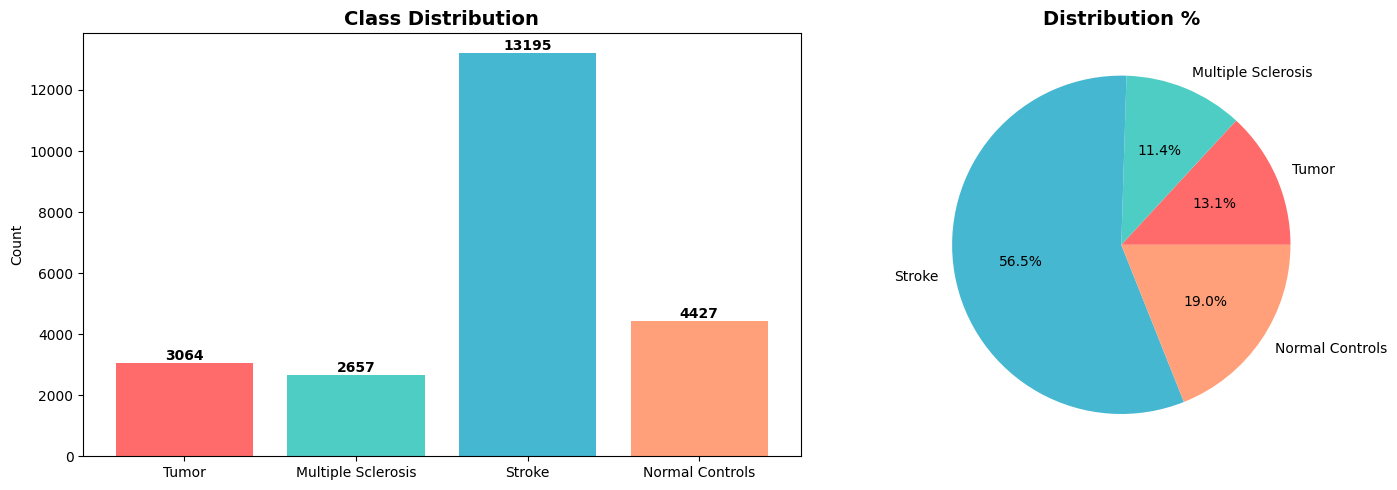

Class Distribution:
           Main_Class  Count  Percentage
0               Tumor   3064       13.13
1  Multiple Sclerosis   2657       11.38
2              Stroke  13195       56.53
3     Normal Controls   4427       18.97


In [81]:
table2 = pd.read_csv(f"{BASE_DIR}/TABLE_2_FINAL.csv")
total = table2['Count'].sum()
table2['Percentage'] = (table2['Count'] / total * 100).round(2)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].bar(table2['Main_Class'], table2['Count'], color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
axes[0].set_title('Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
for i, v in enumerate(table2['Count']):
    axes[0].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

axes[1].pie(table2['Count'], labels=table2['Main_Class'], autopct='%1.1f%%',
            colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
axes[1].set_title('Distribution %', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(f"{BASE_DIR}/EDA_01_distribution.png", dpi=300)
plt.show()

print("Class Distribution:")
print(table2[['Main_Class', 'Count', 'Percentage']])

## Image statistics

In [82]:
def get_image_stats(folder_path, max_samples=50):
    """Extract statistics from images in a folder"""
    if not os.path.exists(folder_path):
        return None

    files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))][:max_samples]

    heights, widths, pixels = [], [], []

    for f in tqdm(files, desc=os.path.basename(folder_path)):
        try:
            img = Image.open(os.path.join(folder_path, f))
            w, h = img.size
            widths.append(w)
            heights.append(h)
            pixels.extend(np.array(img).flatten())
        except:
            pass

    return {
        'Height': np.mean(heights) if heights else 0,
        'Width': np.mean(widths) if widths else 0,
        'PixelMin': np.min(pixels) if pixels else 0,
        'PixelMax': np.max(pixels) if pixels else 0,
        'PixelMean': np.mean(pixels) if pixels else 0,
    }

stats_list = []
for src, path in [
    ("MRI Tumor", f"{PROC_DIR}/MRI/tumor_binary/tumor/"),
    ("MRI Normal", f"{PROC_DIR}/MRI/tumor_binary/normal/"),
    ("CT Stroke", f"{PROC_DIR}/CT/stroke_binary/stroke/"),
    ("CT Normal", f"{PROC_DIR}/CT/stroke_binary/normal/"),
]:
    s = get_image_stats(path)
    if s:
        s['Source'] = src
        stats_list.append(s)

df_stats = pd.DataFrame(stats_list)
print("\nImage Statistics:")
print(df_stats)

100%|██████████| 50/50 [01:08<00:00,  1.38s/it]



Image Statistics:
   Height  Width  PixelMin  PixelMax   PixelMean      Source
0  390.36  345.4         0       255   63.917362   MRI Tumor
1  304.12  298.3         0       255   53.613092  MRI Normal
2  516.94  512.0         0       255   98.947676   CT Stroke
3  512.00  512.0         0       255  100.453717   CT Normal


## Sample images

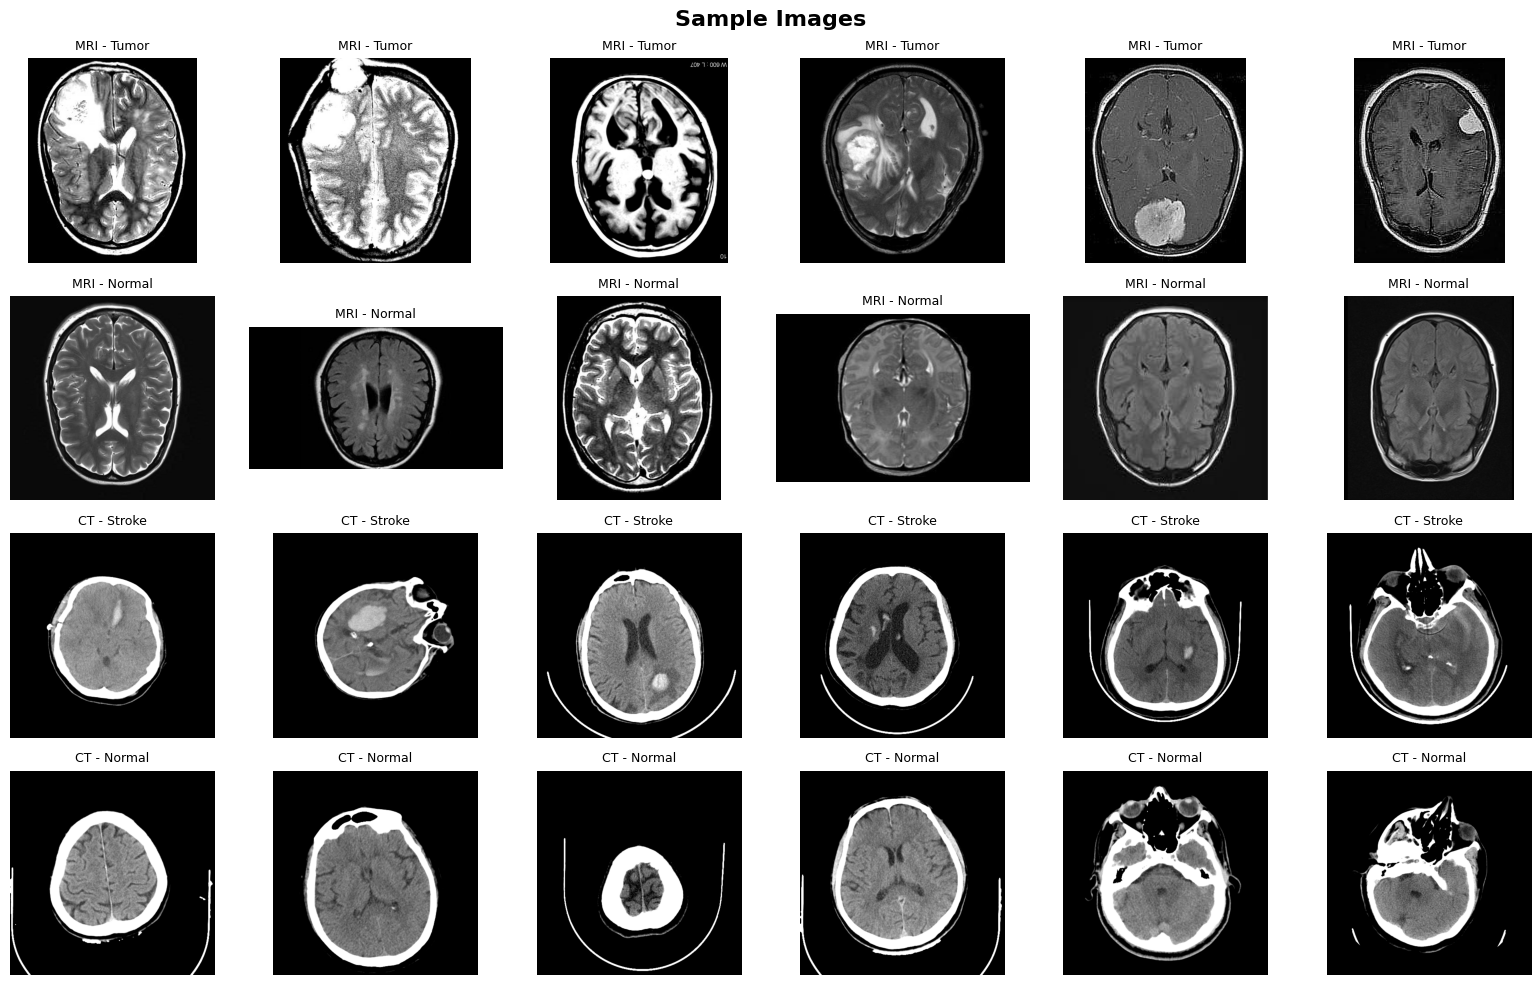

In [83]:
fig = plt.figure(figsize=(16, 10))
idx = 1

for title, path in [
    ("MRI - Tumor", f"{PROC_DIR}/MRI/tumor_binary/tumor/"),
    ("MRI - Normal", f"{PROC_DIR}/MRI/tumor_binary/normal/"),
    ("CT - Stroke", f"{PROC_DIR}/CT/stroke_binary/stroke/"),
    ("CT - Normal", f"{PROC_DIR}/CT/stroke_binary/normal/"),
]:
    if not os.path.exists(path):
        continue

    files = [f for f in os.listdir(path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))][:6]

    for filename in files:
        ax = plt.subplot(4, 6, idx)
        try:
            img = Image.open(os.path.join(path, filename))
            ax.imshow(img, cmap='gray')
            ax.set_title(f"{title}", fontsize=9)
        except:
            pass
        ax.axis('off')
        idx += 1

plt.suptitle('Sample Images', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f"{BASE_DIR}/EDA_02_samples.png", dpi=300)
plt.show()

## Modality comparison

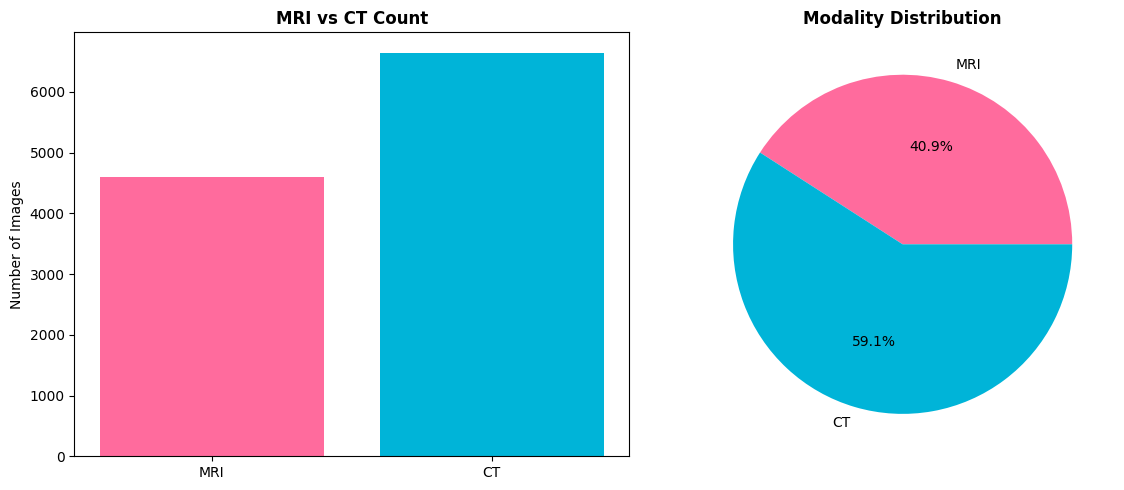


Modality Distribution:
  MRI: 4,602 (40.9%)
  CT:  6,650 (59.1%)


In [84]:
mri_files = 0
ct_files = 0

for path in [f"{PROC_DIR}/MRI/tumor_binary/tumor/", f"{PROC_DIR}/MRI/tumor_binary/normal/",
             f"{PROC_DIR}/MRI/tumor_multiclass/Glioma/"]:
    if os.path.exists(path):
        mri_files += len([f for f in os.listdir(path)])

for path in [f"{PROC_DIR}/CT/stroke_binary/stroke/", f"{PROC_DIR}/CT/stroke_binary/normal/"]:
    if os.path.exists(path):
        ct_files += len([f for f in os.listdir(path)])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(['MRI', 'CT'], [mri_files, ct_files], color=['#FF6B9D', '#00B4D8'])
axes[0].set_title('MRI vs CT Count', fontweight='bold')
axes[0].set_ylabel('Number of Images')

axes[1].pie([mri_files, ct_files], labels=['MRI', 'CT'], autopct='%1.1f%%',
            colors=['#FF6B9D', '#00B4D8'])
axes[1].set_title('Modality Distribution', fontweight='bold')

plt.tight_layout()
plt.savefig(f"{BASE_DIR}/EDA_03_modality.png", dpi=300)
plt.show()

print(f"\nModality Distribution:")
print(f"  MRI: {mri_files:,} ({mri_files/(mri_files+ct_files)*100:.1f}%)")
print(f"  CT:  {ct_files:,} ({ct_files/(mri_files+ct_files)*100:.1f}%)")

## Channel & color consistency

In [16]:
from PIL import Image

f = os.path.join(f"{PROC_DIR}/MRI/tumor_binary/tumor/", "y1448.jpg")
img = Image.open(f)
print(img.mode, img.size, img.getbands())


RGB (253, 291) ('R', 'G', 'B')


In [19]:
from collections import Counter
from PIL import Image
import os

def channel_distribution(folder, max_samples=200):
    counter = Counter()

    files = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    for f in files[:max_samples]:
        path = os.path.join(folder, f)
        try:
            with Image.open(path) as img:
                counter[img.mode] += 1
        except Exception as e:
            print(f"Skipped {f}: {e}")

    return counter


In [22]:
print("MRI Tumor channels:", channel_distribution(f"{PROC_DIR}/MRI/tumor_binary/tumor/"))
print("CT Stroke channels:", channel_distribution(f"{PROC_DIR}/CT/stroke_binary/stroke/"))

MRI Tumor channels: Counter({'RGB': 197, 'L': 3})
CT Stroke channels: Counter({'RGBA': 200})


-> Standardize ALL images to single-channel grayscale

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def plot_intensity_hist(folder, title, max_samples=100):
    files = [f for f in os.listdir(folder) if f.lower().endswith(".jpg") or f.lower().endswith(".png")]
    pixels = []

    for f in files[:max_samples]:
        path = os.path.join(folder, f)
        try:
            with Image.open(path) as img:
                img = img.convert("L")
                pixels.extend(np.array(img).flatten())
        except Exception as e:
            print("Failed:", path, e)

    print(f"{title}: collected {len(pixels)} pixels")

    plt.figure(figsize=(6,4))
    plt.hist(pixels, bins=100)
    plt.title(title)
    plt.xlabel("Pixel intensity")
    plt.ylabel("Frequency")
    plt.show()


MRI Tumor Intensity: collected 17475012 pixels


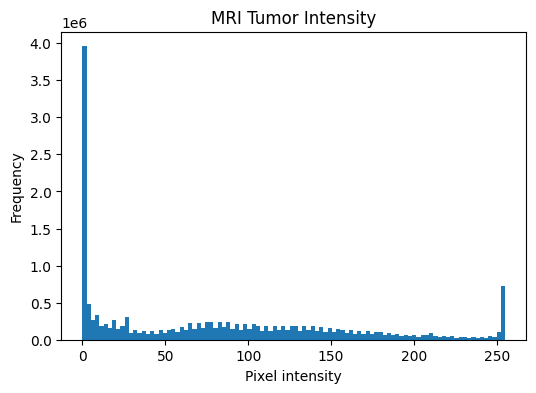

CT Stroke Intensity: collected 26280960 pixels


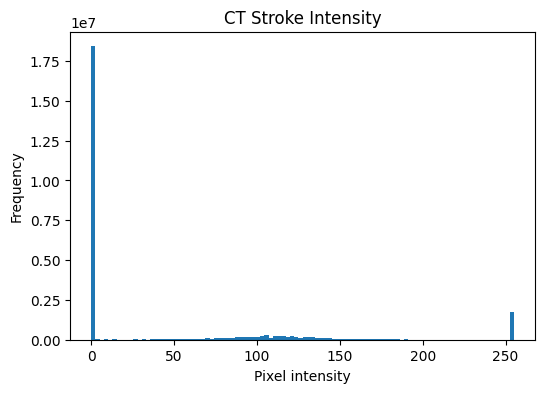

In [21]:
plot_intensity_hist(f"{PROC_DIR}/MRI/tumor_binary/tumor/", "MRI Tumor Intensity")
plot_intensity_hist(f"{PROC_DIR}/CT/stroke_binary/stroke/", "CT Stroke Intensity")


In [23]:
!pip install imagehash
import imagehash

def find_duplicates(folder, max_samples=500):
    hashes = {}
    duplicates = []
    for f in os.listdir(folder)[:max_samples]:
        try:
            img = Image.open(os.path.join(folder, f))
            h = imagehash.phash(img)
            if h in hashes:
                duplicates.append((f, hashes[h]))
            else:
                hashes[h] = f
        except:
            pass
    return duplicates

dups = find_duplicates(f"{PROC_DIR}/MRI/tumor_multiclass/Glioma/")
print("Potential duplicates:", len(dups))


Potential duplicates: 59
